New notebook. First question: is temp behaving differently this year?


In [50]:
import numpy as np
import seaborn as sns
import pandas as pd
import sys
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from scipy.optimize import curve_fit as cf

In [3]:
temp_data = pd.read_csv("3396352.csv")
temp_data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,...,TMIN,TOBS,WESD,WESF,WT01,WT03,WT04,WT05,WT06,WT11
0,US1MNRM0163,"SAINT PAUL 3.5 WSW, MN US",44.9336,-93.17248,285.9,2022-01-01,NaN,NaN,0.10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1MNRM0163,"SAINT PAUL 3.5 WSW, MN US",44.9336,-93.17248,285.9,2022-01-02,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1MNRM0163,"SAINT PAUL 3.5 WSW, MN US",44.9336,-93.17248,285.9,2022-01-03,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1MNRM0163,"SAINT PAUL 3.5 WSW, MN US",44.9336,-93.17248,285.9,2022-01-04,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1MNRM0163,"SAINT PAUL 3.5 WSW, MN US",44.9336,-93.17248,285.9,2022-01-05,NaN,NaN,0.12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
temp_data['DATE'] = pd.to_datetime(temp_data['DATE'])

In [5]:
ram_temp_df = pd.read_csv("3397798.csv")

In [6]:
ram_temp_df['DATE']= pd.to_datetime(ram_temp_df['DATE'])

In [7]:
ram_temp_df.sort_values(by=['STATION', 'DATE'], inplace=True)

In [8]:
grouped_df = ram_temp_df.groupby('STATION')
ram_temp_df['tmax_diff'] = grouped_df['TMAX'].diff()



,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,TOBS,tmax_diff
3908,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2018-09-21,NaN,NaN,NaN,NaN,NaN
3909,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2021-03-23,NaN,NaN,NaN,NaN,NaN
3910,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2021-03-24,NaN,NaN,NaN,NaN,NaN
3911,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2021-03-25,NaN,NaN,NaN,NaN,NaN
3912,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2021-03-26,NaN,NaN,NaN,NaN,NaN


In [9]:
ram_temp_df.head(20)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,TOBS,tmax_diff
3908,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2018-09-21,NaN,NaN,NaN,NaN,NaN
3909,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2021-03-23,NaN,NaN,NaN,NaN,NaN
3910,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2021-03-24,NaN,NaN,NaN,NaN,NaN
3911,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2021-03-25,NaN,NaN,NaN,NaN,NaN
3912,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2021-03-26,NaN,NaN,NaN,NaN,NaN
3913,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2022-01-01,NaN,NaN,NaN,NaN,NaN
3914,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2022-01-02,NaN,NaN,NaN,NaN,NaN
3915,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2022-01-03,NaN,NaN,NaN,NaN,NaN
3916,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2022-01-04,NaN,NaN,NaN,NaN,NaN
3917,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2022-01-05,NaN,NaN,NaN,NaN,NaN


In [10]:
ram_tmax_df = ram_temp_df[~ram_temp_df.TMAX.isna()]

In [11]:
ram_tmax_df.head(20)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,TOBS,tmax_diff
16613,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-01,NaN,-8.0,-18.0,NaN,NaN
16614,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-02,NaN,0.0,-15.0,NaN,8.0
16615,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-03,NaN,12.0,-11.0,-1.0,12.0
16616,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-04,NaN,4.0,-8.0,-6.0,-8.0
16617,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-05,NaN,4.0,-11.0,NaN,0.0
16618,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-06,NaN,1.0,-13.0,NaN,-3.0
16619,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-07,NaN,13.0,-12.0,NaN,12.0
16620,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-08,NaN,30.0,13.0,24.0,17.0
16621,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-09,NaN,35.0,24.0,NaN,5.0
16622,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-10,NaN,41.0,29.0,33.0,6.0


<Axes: xlabel='DATE', ylabel='tmax_diff'>

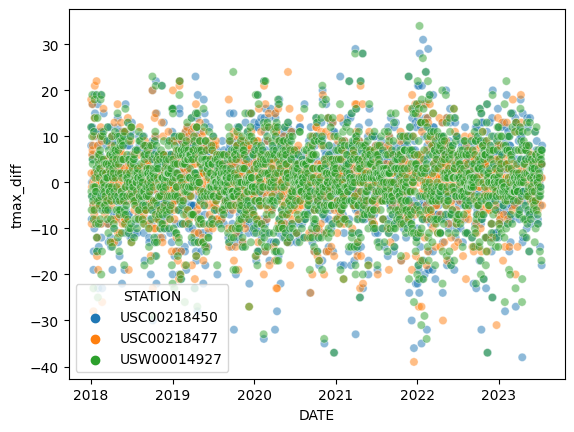

In [14]:
sns.scatterplot(x="DATE", y="tmax_diff",
             hue="STATION", alpha = 0.5,
             data=ram_tmax_df)

"Diff" is a hacky but easy way to look at this; of course in shoulder seasons (spring, fall) a larger diff is expected. Perhaps we really do need to look at deviation from cyclic model, to better deal with this seasonal variation in standard deviation. 

If we fit a curve like that, we need to acknowledge what we're doing. There is real danger in overfitting.

I will proceed to do some slightly unscientific things. First, I'll fit a STL model; it's defensible haha. (What's unscientific? I'm not using many years of data; I'm not using a holdout set or measuring accuracy or anything.)


(Interesting references for later: https://www.sciencedirect.com/science/article/pii/S2212094722000251)

## Point data

I have three locations and thus three time series. I need to sort these out.


In [24]:
tmax_series_dict = {station: pd.Series(ram_tmax_df[ram_tmax_df.STATION == station].TMAX.values, index = ram_tmax_df[ram_tmax_df.STATION == station].DATE) for station in ram_tmax_df.STATION.unique()}



In [26]:
tmax_series_dict['USW00014927']

DATE
2018-01-01     2.0
2018-01-02    14.0
2018-01-03    12.0
2018-01-04     6.0
2018-01-05     3.0
              ... 
2023-07-09    86.0
2023-07-10    93.0
2023-07-11    76.0
2023-07-12    80.0
2023-07-13    87.0
Length: 2019, dtype: float64

In [27]:
tmax_series_dict.keys()

dict_keys(['USC00218450', 'USC00218477', 'USW00014927'])

In [16]:
#tmax_series = pd.Series(ram_tmax_df['TMAX'].values, index = ram_tmax_df['DATE'])

In [45]:
decomp_dict = {}
for station in tmax_series_dict.keys():
    decomposition = STL(tmax_series_dict[station], period=365, robust = True).fit() #sm.tsa.seasonal_decompose(tmax_series_dict[station], model='additive', period = 365)
    # using additive model because this is only 5-6 years
    #trend = decomposition.trend
    #seasonal = decomposition.seasonal
    #residual = decomposition.resid
    decomp_dict[(station, 'stl')] = decomposition
    

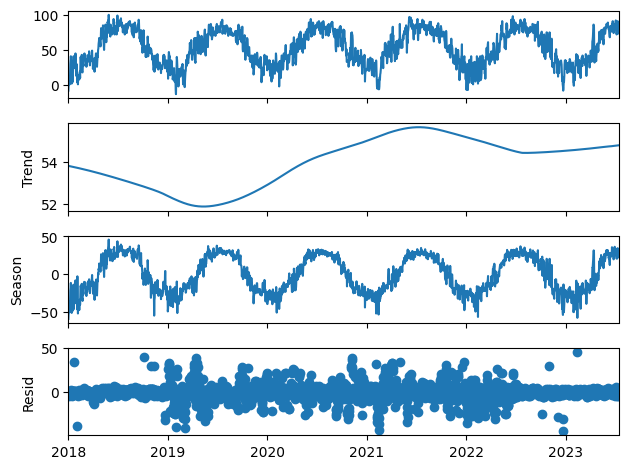

In [46]:
res = decomp_dict[('USC00218450', 'stl')]
res.plot()
plt.show()

Now I can use the residuals instead of the diffs. It does address a slightly different question... but it produces a far more stationary series. 

My concern is that because it's only 5.5 years, and STL is adaptive, the algo may be wrapping more deviation up in the seasonal component than is really appropriate. Maybe I need something slightly crappier but more robust.

Alright. I want to know if this summer has lower standard deviation in residuals, with the HUGE caveat I just outlined. (In fact, to look at that caveat, let's look at std in seasonality as well.)

In [47]:
tmax_series_dict.keys()

dict_keys(['USC00218450', 'USC00218477', 'USW00014927'])

<Axes: xlabel='DATE'>

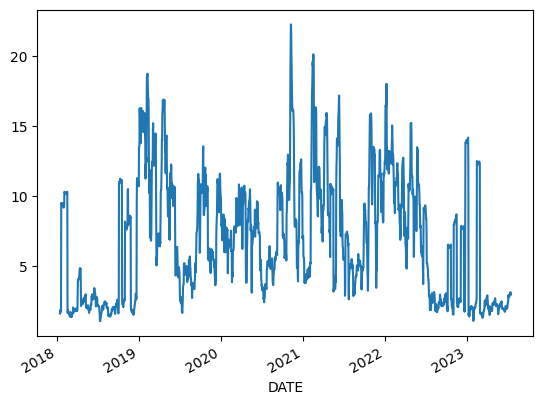

In [48]:
decomp_dict[('USC00218450', 'stl')].resid.rolling(14).std().plot()
# Rolling 14 day standard deviation in residuals from STL decomposition

<Axes: xlabel='DATE'>

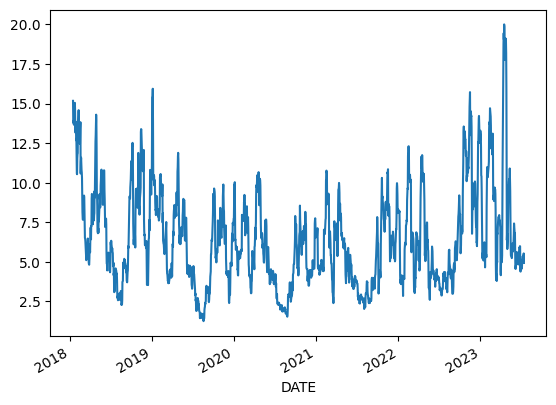

In [49]:
decomp_dict[('USC00218450', 'stl')].seasonal.rolling(14).std().plot()

Ugh. Yep, there it is.

Ok, let's try to create something "crappier" and less overfit.

In [71]:
def sin_fun(x,a,b,c,d):
    return a*np.sin(b*x+c)+d
# need shift

In [53]:
# need starting guess for average
ram_temp_df.TMAX.describe()

count    5969.000000
mean       54.581504
std        24.393764
min       -13.000000
25%        35.000000
50%        54.000000
75%        77.000000
max       100.000000
Name: TMAX, dtype: float64

In [54]:
100-54


46

In [55]:
ram_temp_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,TOBS,tmax_diff
3908,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2018-09-21,NaN,NaN,NaN,NaN,NaN
3909,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2021-03-23,NaN,NaN,NaN,NaN,NaN
3910,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2021-03-24,NaN,NaN,NaN,NaN,NaN
3911,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2021-03-25,NaN,NaN,NaN,NaN,NaN
3912,US1MNRM0001,"KOHLMAN PARK, MN US",45.0208,-93.0542,262.4,2021-03-26,NaN,NaN,NaN,NaN,NaN


In [56]:
tmax_series_dict.keys()

dict_keys(['USC00218450', 'USC00218477', 'USW00014927'])

In [57]:
tmax_series_dict['USC00218450']

DATE
2018-01-01    -8.0
2018-01-02     0.0
2018-01-03    12.0
2018-01-04     4.0
2018-01-05     4.0
              ... 
2023-07-10    84.0
2023-07-11    91.0
2023-07-12    73.0
2023-07-13    77.0
2023-07-14    85.0
Length: 2015, dtype: float64

In [59]:
tmax_series_dict['USC00218450'].index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2023-07-05', '2023-07-06', '2023-07-07', '2023-07-08',
               '2023-07-09', '2023-07-10', '2023-07-11', '2023-07-12',
               '2023-07-13', '2023-07-14'],
              dtype='datetime64[ns]', name='DATE', length=2015, freq=None)

In [79]:
# initial value for period
365/(2*np.pi)

58.0915542285418

In [86]:
p_opt,p_cov=cf(sin_fun,range(len(tmax_series_dict['USC00218450'])), 
               tmax_series_dict['USC00218450'], 
               p0=(46, 1/58,91, 45))
print(p_opt)
# 46 is initial guess for amplitude, 58 is 365/2pi, 91 is my guess at the offset (365/4), 
# and 45 is guess at mean


[3.17119559e+01 1.71687947e-02 9.24097116e+01 5.36367341e+01]


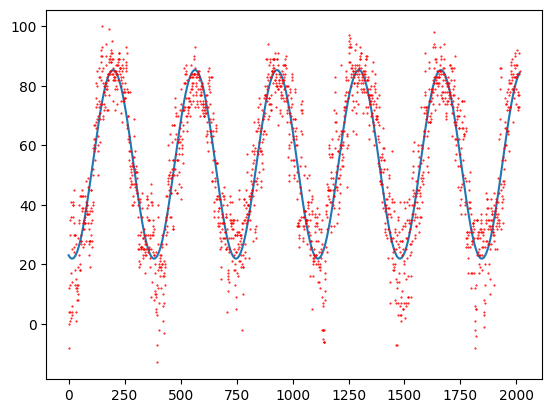

In [88]:
plt.plot(range(len(tmax_series_dict['USC00218450'])),sin_fun(range(len(tmax_series_dict['USC00218450'])),*p_opt))
plt.plot(range(len(tmax_series_dict['USC00218450'])),tmax_series_dict['USC00218450'], 'r.', ms=1)
plt.show()

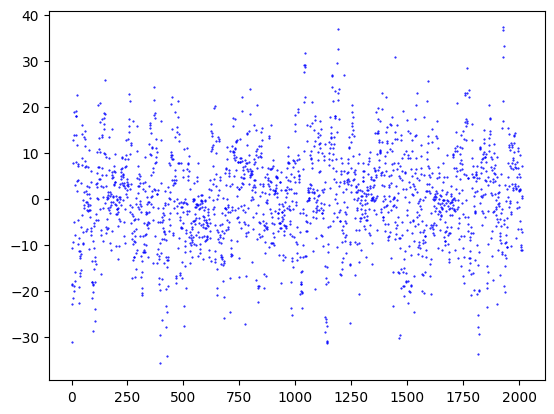

In [94]:
plt.plot(range(len(tmax_series_dict['USC00218450'])),
         tmax_series_dict['USC00218450']-sin_fun(range(len(tmax_series_dict['USC00218450'])),*p_opt),
         'b.',
          ms=1)

In [97]:
temporary_series = pd.Series(tmax_series_dict['USC00218450']-sin_fun(range(len(tmax_series_dict['USC00218450'])), *p_opt),
           index = ram_tmax_df[ram_tmax_df.STATION == 'USC00218450'].DATE)

<Axes: xlabel='DATE'>

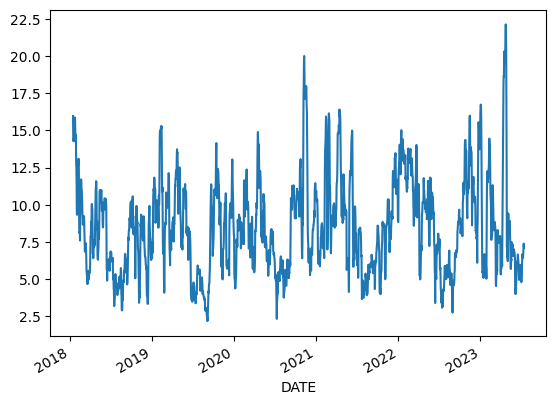

In [98]:
temporary_series.rolling(14).std().plot()

Vaguely dissatisfied.

In [ ]:
for station in tmax_series_dict.keys():
    decomposition = (tmax_series_dict[station], period=365).fit() #sm.tsa.seasonal_decompose(tmax_series_dict[station], model='additive', period = 365)
    # using additive model because this is only 5-6 years
    #trend = decomposition.trend
    #seasonal = decomposition.seasonal
    #residual = decomposition.resid